In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df_amazon = pd.read_csv("/Users/gabrielaclementedeoliveira/Downloads/amz_uk_price_prediction_dataset.csv")
df_amazon

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [3]:
crosstab_result = pd.crosstab(df_amazon['category'], df_amazon['isBestSeller'])

crosstab_result.sort_values(by= False, ascending = False)

isBestSeller,False,True
category,,
Sports & Outdoors,835935,330
"Handmade Clothing, Shoes & Accessories",19215,14
Bath & Body,19059,33
Beauty,19010,302
Birthday Gifts,18943,35
...,...,...
Motorbike Chassis,107,0
Plugs,106,1
Alexa Built-In Devices,106,1


In [4]:
sorted_crosstab = crosstab_result.sort_values(by=True, ascending=False)
pd.set_option('display.max_rows', 500) #to show all rows, limit 500
sorted_crosstab

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [5]:
proportion_table = crosstab_result.div(crosstab_result.sum(axis = 1), axis = 0).round(2)
proportion_table

isBestSeller,False,True
category,,
3D Printers,1.00,0.00
3D Printing & Scanning,1.00,0.00
Abrasive & Finishing Products,0.98,0.02
Action Cameras,1.00,0.00
Adapters,0.99,0.01
Agricultural Equipment & Supplies,0.99,0.01
Alexa Built-In Devices,0.99,0.01
Art & Craft Supplies,0.98,0.02
Arts & Crafts,0.98,0.02


In [6]:
proportion_table = proportion_table.sort_values(by=True, ascending=False)
pd.set_option('display.max_rows', 500) #to show all rows, limit 500
proportion_table

isBestSeller,False,True
category,,
Smart Home Security & Lighting,0.94,0.06
Health & Personal Care,0.94,0.06
Grocery,0.94,0.06
Power & Hand Tools,0.96,0.04
Mobile Phone Accessories,0.96,0.04
Home Brewing & Wine Making,0.97,0.03
Wind Instruments,0.97,0.03
"Billiard, Snooker & Pool",0.97,0.03
Bakeware,0.97,0.03


In [7]:
#crosstab_result['Total'] = crosstab_result[True] + crosstab_result[False]

In [8]:
#sorted_crosstab_by_total = crosstab_result.sort_values(by='Total', ascending=False)

In [9]:
#sorted_crosstab_by_total 

In [10]:
crosstab_10 = sorted_crosstab.head(10)

In [11]:
crosstab_10

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [12]:
#being a best seller doesn't actually reflects on the total of sales per category.
#sports doesn't have a high percentage of best sellers, but it's the most sold category

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [13]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [14]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart

<Axes: xlabel='category'>

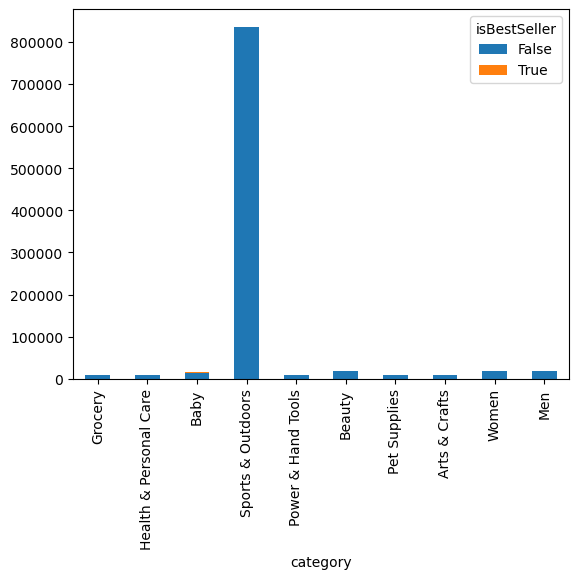

In [15]:
crosstab_10.plot(kind="bar", stacked=True)

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [16]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [17]:
outliers = tukeys_test_outliers(df_amazon['price'])
outliers

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64

In [18]:
array = outliers.values
df_na = df_amazon[~df_amazon['price'].isin(array)]
df_na

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [19]:
df_top20 = df_na[df_na['category'].isin(df_na['category'].value_counts().sort_values(ascending=False).head(20).index)]

In [20]:
df_top20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


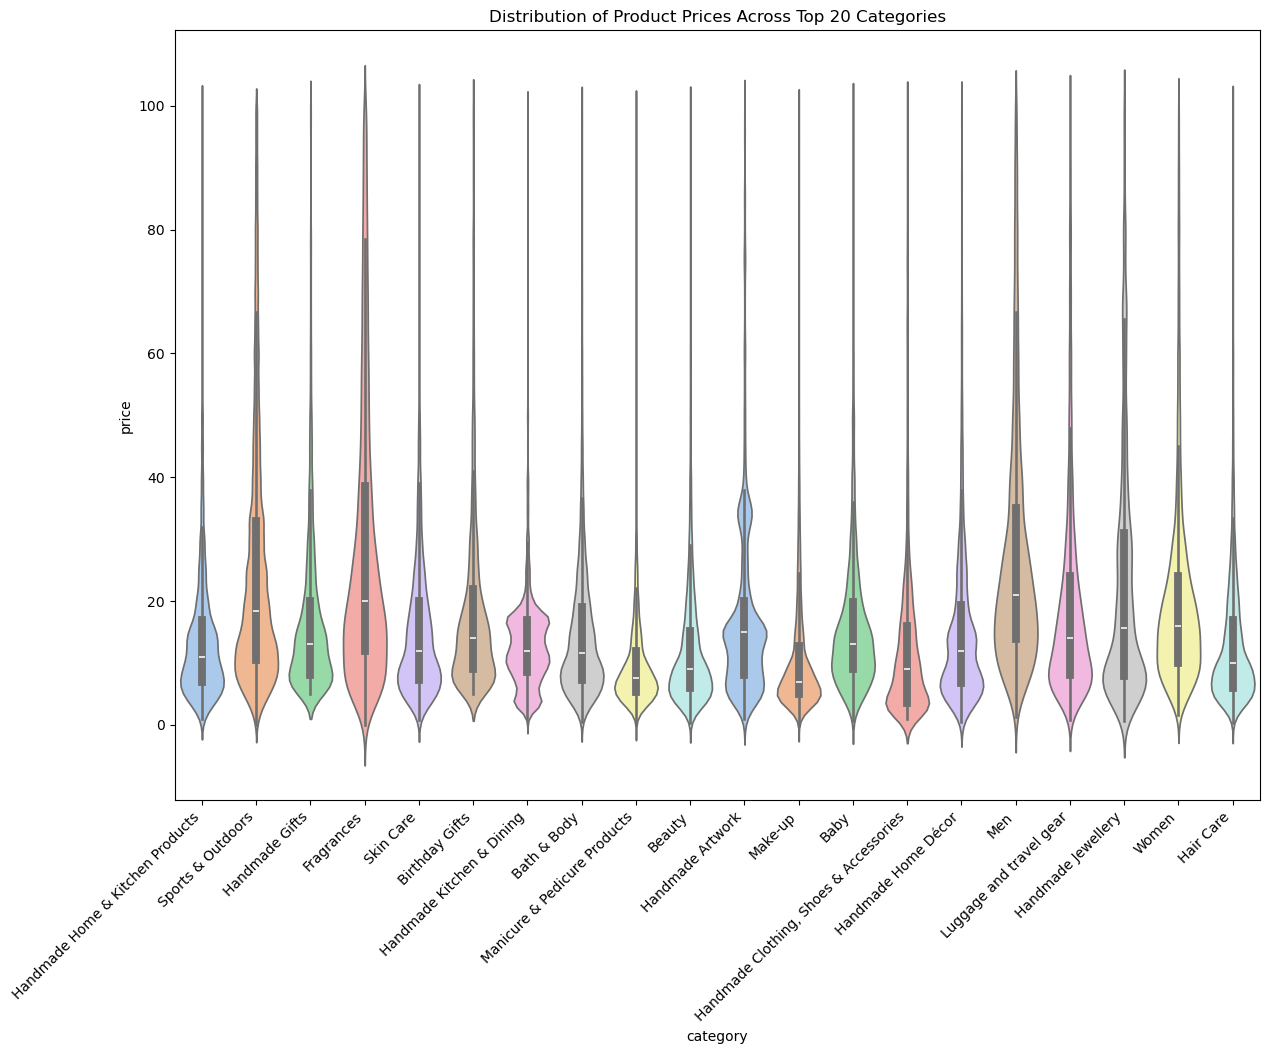

In [21]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='category', y='price', hue='category', data=df_top20, palette='pastel', legend=False)
plt.title('Distribution of Product Prices Across Top 20 Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [26]:
df_top10 = df_na.groupby('category')['price'].mean().head(10).reset_index()
df_top10

,category,price
0,3D Printers,55.739722
1,3D Printing & Scanning,35.623904
2,Abrasive & Finishing Products,14.427611
3,Action Cameras,38.936875
4,Adapters,8.750197
5,Agricultural Equipment & Supplies,18.819428
6,Alexa Built-In Devices,53.927692
7,Art & Craft Supplies,14.583230
8,Arts & Crafts,8.006540
9,Baby,16.389799


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '3D Printers'),
  Text(1, 0, '3D Printing & Scanning'),
  Text(2, 0, 'Abrasive & Finishing Products'),
  Text(3, 0, 'Action Cameras'),
  Text(4, 0, 'Adapters'),
  Text(5, 0, 'Agricultural Equipment & Supplies'),
  Text(6, 0, 'Alexa Built-In Devices'),
  Text(7, 0, 'Art & Craft Supplies'),
  Text(8, 0, 'Arts & Crafts'),
  Text(9, 0, 'Baby')])

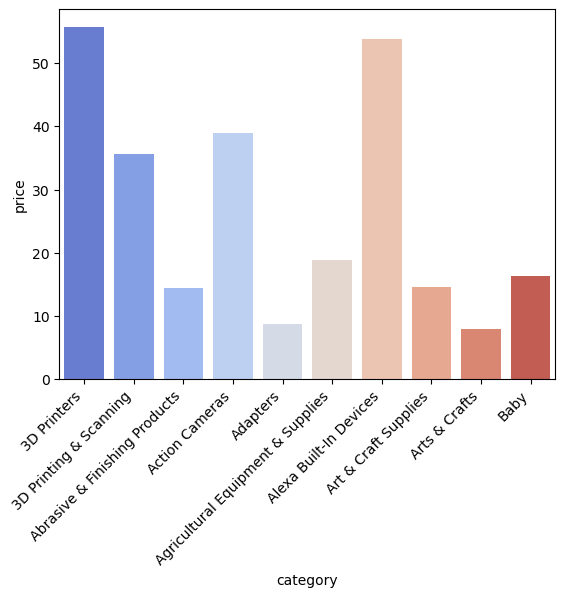

In [29]:
sns.barplot(data=df_top10, x='category', y='price', hue = 'category', palette="coolwarm")
plt.xticks(rotation=45, ha='right')

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [36]:
top10_categories = df_na[df_na['category'].isin(df_na['category'].value_counts().sort_values(ascending=False).head(10).index)]
top10_categories = top10_categories.loc[top10_categories['stars'] != 0] #exclude the rating 0

/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_35718/1428081631.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = top10_categories, x='category', y='stars', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

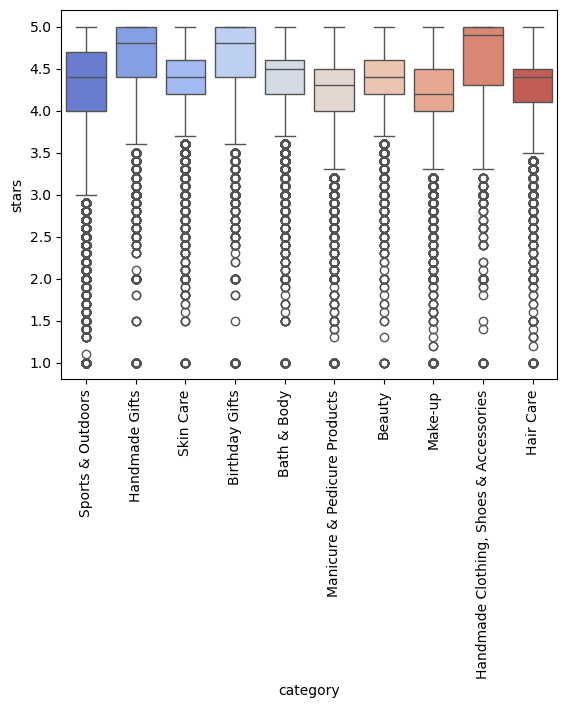

In [38]:
sns.boxplot(data = top10_categories, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation = 90)

In [39]:
df_stars = df_na.loc[df_na['stars'] != 0] #exclude the rating 0

In [44]:
df_stars = df_stars.groupby('category')['stars'].mean().head(10).reset_index()

In [49]:
df_stars.sort_values(by= 'stars', ascending = False)

,category,stars
8,Arts & Crafts,4.479436
7,Art & Craft Supplies,4.454299
9,Baby,4.450642
2,Abrasive & Finishing Products,4.404762
1,3D Printing & Scanning,4.371429
4,Adapters,4.330041
5,Agricultural Equipment & Supplies,4.288889
0,3D Printers,4.158333
6,Alexa Built-In Devices,4.156410
3,Action Cameras,3.708919



### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

In [50]:
df_amazon_clean = df_na.loc[df_na['stars'] != 0] #exclude the rating 0

In [51]:
correlation = df_amazon_clean['price'].corr(df_amazon_clean['stars'])
correlation

0.006744508067157907

In [52]:
correlation_s = df_amazon_clean['price'].corr(df_amazon_clean['stars'], method='spearman')
correlation_s

0.024659617205380468

In [ ]:
#scatter plot

<Axes: xlabel='price', ylabel='stars'>

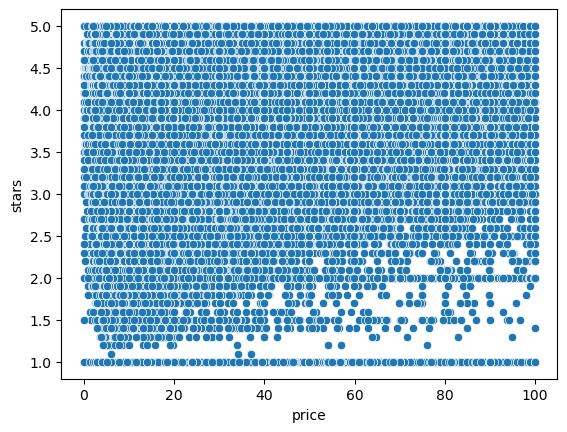

In [54]:
sns.scatterplot(data=df_amazon_clean, x='price', y='stars')

In [ ]:
#heatmap

In [56]:
potential_categorical_from_numerical = df_amazon_clean.select_dtypes("number").loc[:, df_amazon_clean.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443639
2443642
2443644
2443649


In [57]:
df_numerical = df_amazon_clean.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

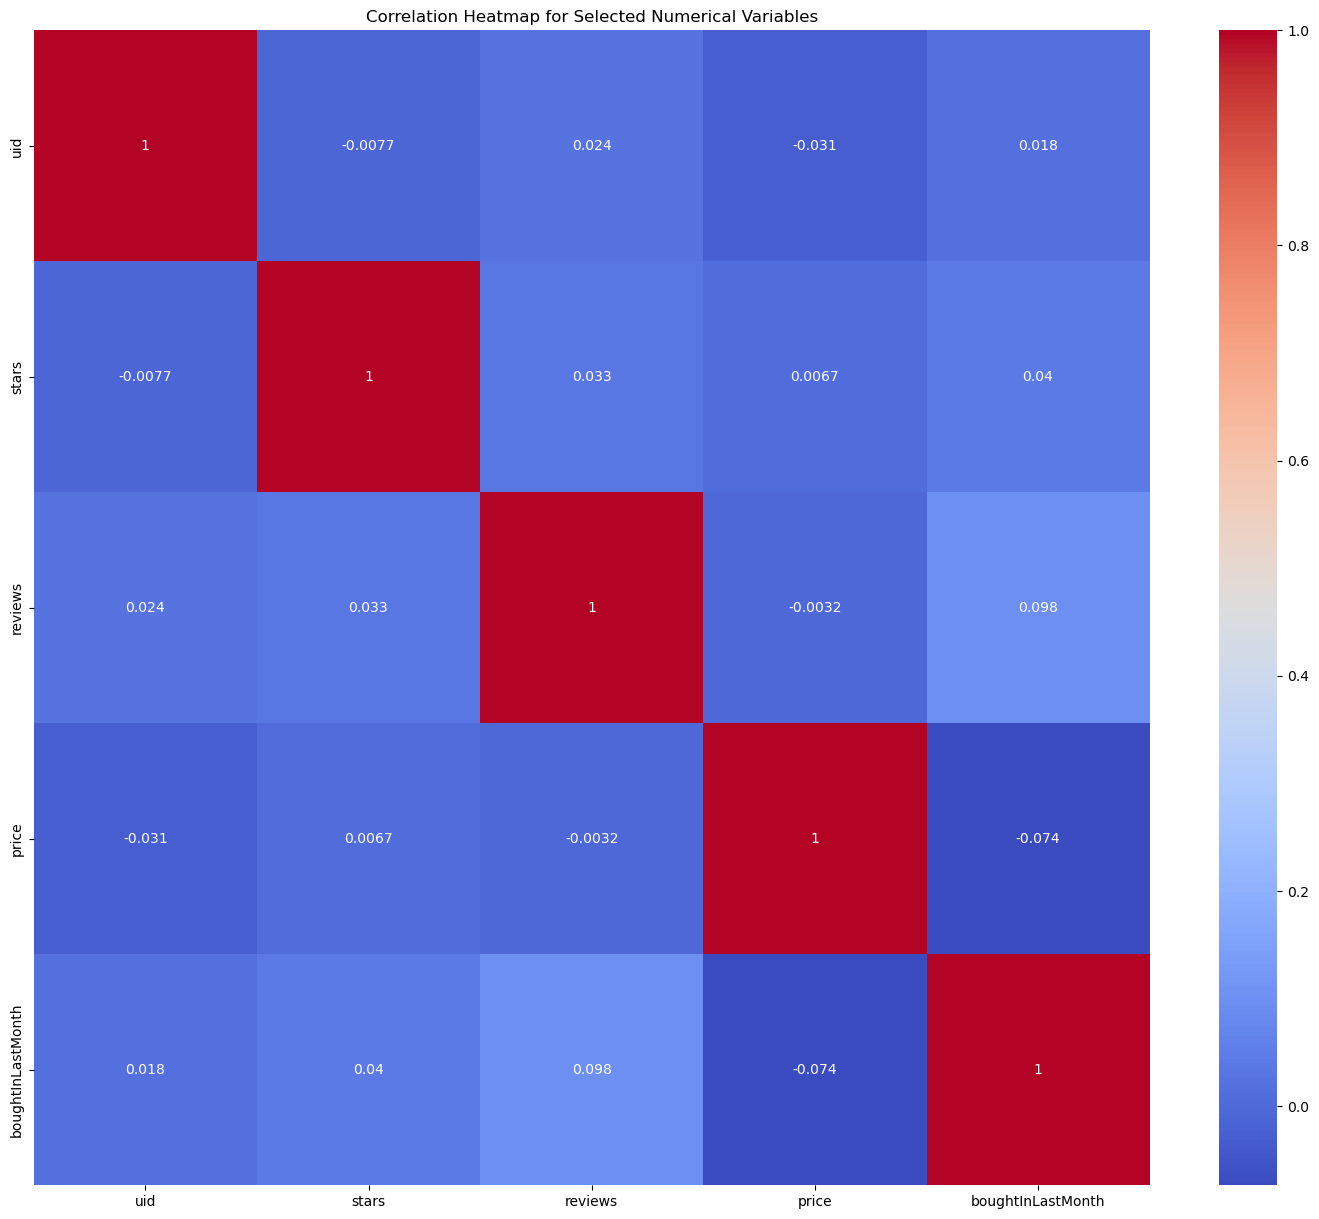

In [59]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [ ]:
#QQ plot

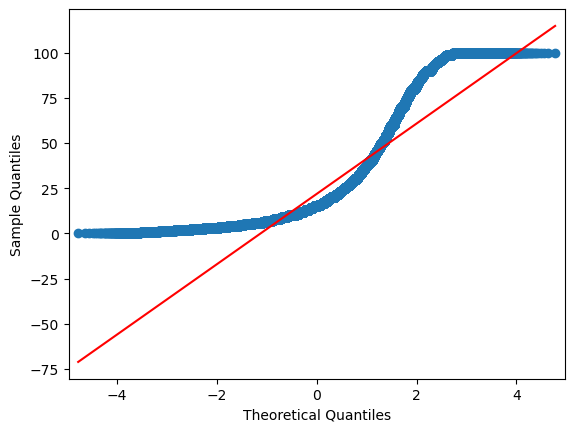

In [63]:
import statsmodels.api as sm
sm.qqplot(df_amazon_clean['price'], line='s');